{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Calculate NDVI using NAIP multispectral imagery in **Python**.
* Export or write a raster to a `.tif` file from **Python**.

</div>


## Calculate NDVI in Python

Sometimes you can download already calculated NDVI data products from a data provider. 

However, in this case, you don't have a pre calculated NDVI product from NAIP data. You need to calculate NDVI using the NAIP imagery / reflectance data that you have downloaded from Earth Explorer.

### How to Derive the NDVI Vegetation Index From Multispectral Imagery

The normalized difference vegetation index (NDVI) uses a ratio between near infrared
and red light within the electromagnetic spectrum. To calculate NDVI you use the
following formula where NIR is near infrared light and
red represents red light. For your raster data, you will take the reflectance value
in the red and near infrared bands to calculate the index.

`(NIR - Red) / (NIR + Red)`

You can perform this calculation using matrix math with the `numpy` library.

To get started, load all of the required **Python** libraries. 

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Next, open up the NAIP data that you wish to calculate NDVI with. You will use the data from 2015 for this example that you downloaded for week 7 of this course:

`data/cold-springs-fire/naip/m_3910505_nw_13_1_20150919/crop/m_3910505_nw_13_1_20150919_crop.tif`

In [2]:
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

# View shape of the data
naip_data.shape

(4, 2312, 4377)

Calculate NDVI using regular numpy array math. In this case, the bands you are subtracting come from the same data file. The tif file format requires that all layers are in the same CRS and of the same size so you assume the data line up. Thus you do not need to test the data for equal shape, crs and extent.

In [3]:
# naip_ndvi = (naip_data[3] - naip_data[0]) / (naip_data[3] + naip_data[0])

In [4]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

Finally plot the data. Note below that the `vmin=` and `vmax=` arguments are used to stretch the colorbar across the full possible range of NDVI values (-1 to 1).

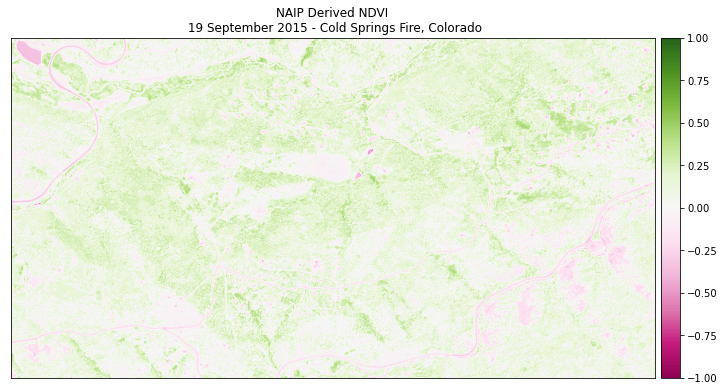

In [5]:
ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

### View Distribution of NDVI Values

Using a histogram, you can view the distribution of pixel values in your NDVI output.

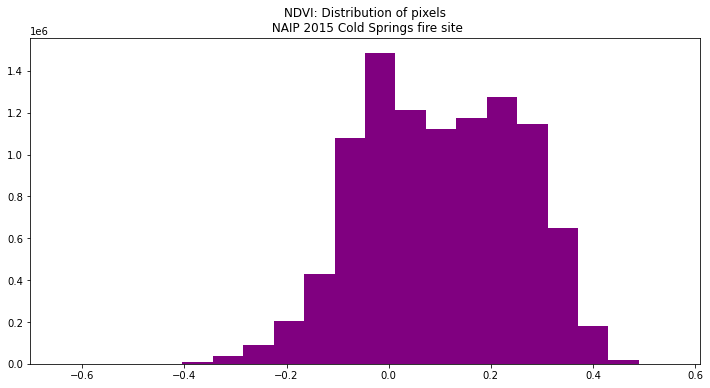

In [6]:
ep.hist(naip_ndvi.values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

## Optional - Export a Numpy Array to a Raster Geotiff in Python

When you are done, you can export your NDVI raster data so you could use them in
QGIS or ArcGIS or share them with your colleagues. To do this, you use the `xarray_name.rio.to_raster()`
function.


In [7]:
# naip_data_path = os.path.join("data", "cold-springs-fire",
#                               "naip", "m_3910505_nw_13_1_20150919",
#                               "crop", "m_3910505_nw_13_1_20150919_crop.tif")

# with rio.open(naip_data_path) as src:
#     naip_data = src.read()
#     naip_meta = src.profile

# naip_transform = naip_meta["transform"]
# naip_crs = naip_meta["crs"]

# # View spatial attributes
# naip_transform, naip_crs

# # Change the count or number of bands from 4 to 1
# naip_meta['count'] = 1

# # Change the data type to float rather than integer
# naip_meta['dtype'] = "float64"
# naip_meta

You can view the type of data stored within the ndvi array using `.dtype`.
Remember that the naip_ndvi object is a xarray DataArray.

In [9]:
type(naip_ndvi), naip_ndvi.dtype

(xarray.core.dataarray.DataArray, dtype('float64'))

Note below that when we write the raster, we use the custom outpath that we make to write it out to a filename and location of our choice.

In [12]:
naip_ndvi_outpath = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

# Write your the ndvi raster object
naip_ndvi.rio.to_raster(naip_ndvi_outpath)

<div class="notice--info" markdown="1">

## Additional Resources

* <a href="https://phenology.cr.usgs.gov/ndvi_foundation.php" target="_blank">USGS Remote Sensing Phenology</a>
* <a href="http://earthobservatory.nasa.gov/Features/MeasuringVegetation/measuring_vegetation_2.php" target="_blank">NASA Earth Observatory - Vegetation Indices</a>

</div>